预测一名六岁半儿童的尿肌酐浓度为： [2.55991289]


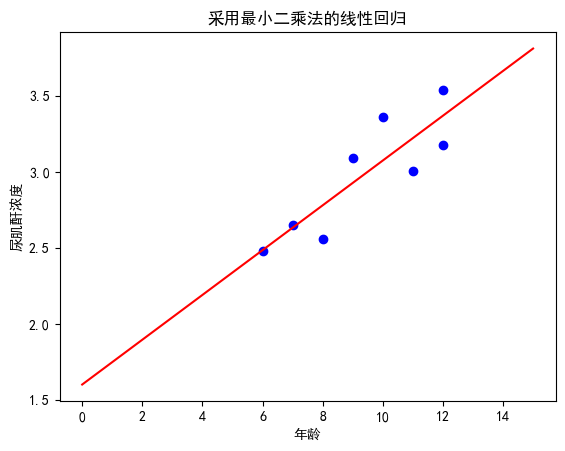

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 定义计算伪逆矩阵的函数
def calculate_pseudo_inverse(X):
    Xt = np.transpose(X)
    XtX_inv = np.linalg.inv(np.dot(Xt, X))
    pseudo_inv = np.dot(XtX_inv, Xt)
    return pseudo_inv

# 数据
X = np.array([[12], [11], [9], [6], [8], [10], [12], [7]])
Y = np.array([[3.54], [3.01], [3.09], [2.48], [2.56], [3.36], [3.18], [2.65]])

# 向X添加一列1
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

# 计算伪逆矩阵
pseudo_inv = calculate_pseudo_inverse(X)

# 计算beta系数
beta = np.dot(pseudo_inv, Y)

# 绘制散点图和拟合直线
plt.scatter(X[:,1], Y, color='blue')
x_new = np.linspace(0, 15, 100).reshape(-1, 1)
ones = np.ones((x_new.shape[0], 1))
x_new = np.hstack((ones, x_new))
y_new = np.dot(x_new, beta)
plt.plot(x_new[:,1], y_new, color='red')

# 预测一名六岁半儿童的尿肌酐浓度
x_pred = np.array([[1, 6.5]])
y_pred = np.dot(x_pred, beta)
print("预测一名六岁半儿童的尿肌酐浓度为：", y_pred[0])

plt.xlabel('年龄')
plt.ylabel('尿肌酐浓度')
plt.title('采用最小二乘法的线性回归')
plt.show()
